# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, attention to detail, coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files & a rink template for scatter plots. One data file has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xG) to be merged onto shot attempts for this game. **If an xG value does not correspond to a shot event, it should not be counted**

- X and Y Coordinates are in feet and are adjusted such that both teams attack from left (dz) to right (oz)
    - X values range from -100 (end boards behind the DZ net) to 0 (centre ice) and 100 (end boards behind the OZ net)
    - Y values range from -42.5 (west side boards) to 0 (centre ice) and 42.5 (east side boards)
    - **When creating scatter plots, please use these coordinates along with the provided rink_template to display the full rink**

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

- Compiledgametime is in seconds, periods are 20 minutes long, except for overtime which is 5 minutes or less

Please show all work, **keep written answers succinct and to the point** and most of all, thanks for your time and good luck!

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.dpi'] = 100

gameEventCols = ['eventname', 'outcome', 'type', 'compiledgametime', 'playsection', 'zone', 'manpowersituation', 'goal', 'teamid', 'playerid', 'opposingteamgoalieoniceid', 'xadjcoord', 'yadjcoord']
xgCols = ['compiledgametime', 'playerid', 'xg']

gameEvent = pd.read_csv('DA_Tutorial_24.csv', encoding='unicode_escape', usecols=gameEventCols)
xg = pd.read_csv('DA_Tutorial_24_xg.csv', encoding='unicode_escape', usecols=xgCols)

game_eventName = gameEvent['eventname'].to_numpy()
game_outcome = gameEvent['outcome'].to_numpy()
game_type = gameEvent['type'].to_numpy()
game_compiledTime = gameEvent['compiledgametime'].to_numpy()
game_playSection = gameEvent['playsection'].to_numpy()
game_zone = gameEvent['zone'].to_numpy()
game_manpower = gameEvent['manpowersituation'].to_numpy()
game_goal = gameEvent['goal'].to_numpy()
game_teamID = gameEvent['teamid'].to_numpy()
game_playerID = gameEvent['playerid'].to_numpy()
game_opposingGoalieID = gameEvent['opposingteamgoalieoniceid'].to_numpy()
game_xAdj = gameEvent['xadjcoord'].to_numpy()
game_yAdj = gameEvent['yadjcoord'].to_numpy()

xg_compiledTime = xg['compiledgametime'].to_numpy()
xg_playerID = xg['playerid'].to_numpy()
xg_expectedGoals = xg['xg'].to_numpy()

## Q1) 
### a) Which teamid won the game, what was the score, which period was the winning goal scored in?
### b) Limited to the period where the winning goal was scored, create a scatter plot for the winning team's shot attempts in that period and highlight the winning goal in a different colour.

In [17]:
# Q1 Part a)
team1_goals = np.where((game_teamID == 311) & (game_goal == 1), 1, 0)
team2_goals = np.where((game_teamID == 315) & (game_goal == 1), 1, 0)

print('Team 311 goals:', np.sum(team1_goals))
print('Team 315 goals:', np.sum(team2_goals))

def determinePeriod(time):
    if (time >= 0) & (time < 1200):
        return 1
    elif (time >= 1200) & (time < 2400):
        return 2
    elif (time >= 2400) & (time < 3600):
        return 3
    else:
        return 4
    
def getGoalsIndex(goals):
    return np.where(goals == 1)[0]

game_totalTime = 0

# If team 311 won the game 
if np.sum(team1_goals) > np.sum(team2_goals):
    
    team1_goalsIndex = getGoalsIndex(team1_goals)
    team1_goalTimes = np.take(game_compiledTime, team1_goalsIndex)
    
    team1_lastGoalTime = team1_goalTimes[-1]
    
    print('Winning goal was in period', determinePeriod(team1_lastGoalTime), 'by team 311')
    game_totalTime = team1_lastGoalTime
# If team 315 won the game
else:
    team2_goalsIndex = getGoalsIndex(team2_goals)
    team2_goalTimes = np.take(game_compiledTime, team2_goalsIndex, axis=None)
    
    team2_lastGoalTime = team2_goalTimes[-1]

    print('Winning goal was in period', determinePeriod(team2_lastGoalTime), 'by team 315')
    game_totalTime = team2_lastGoalTime

Team 311 goals: 3
Team 315 goals: 4
Winning goal was in period 4 by team 315


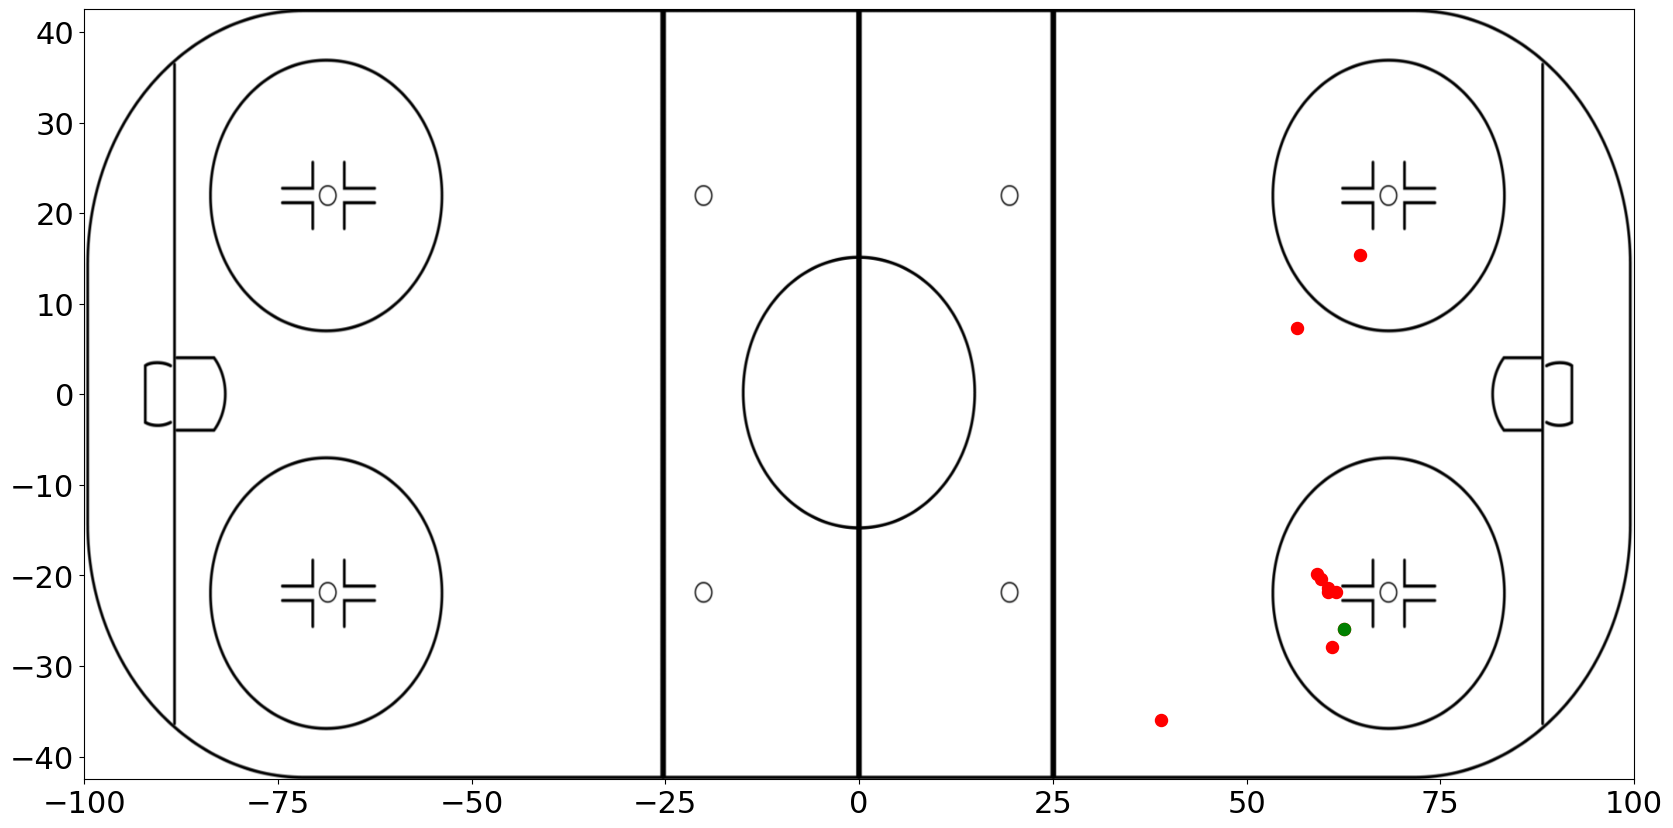

In [18]:
# Q1 Part b)
plt.figure(figsize=(20, 10))

rink = plt.imread('rink_template.png')
rinkPlot = plt.imshow(rink, aspect='auto', extent=[-100, 100, -42.5, 42.5])

# Team 315 shots in overtime where overtime is over 3600 game seconds
team2_shots = np.where((game_teamID == 315) & (game_eventName == 'shot') & (game_compiledTime > 3600))[0]

shots_x_coords = np.take(game_xAdj, team2_shots)
shots_y_coords = np.take(game_yAdj, team2_shots)

plt.scatter(shots_x_coords, shots_y_coords, c='r', s=75)

# Winning Goal index
team2_goals = np.where((game_teamID == 315) & (game_goal == 1))[0]

shots_gameWinner_x_coords = np.take(game_xAdj, team2_goals)
shots_gameWinner_y_coords = np.take(game_yAdj, team2_goals)

# Last goal was the winning goal
plt.scatter(shots_gameWinner_x_coords[-1], shots_gameWinner_y_coords[-1], c='g', s=75)

plt.show()

## A1)
### a) Team 315 won the game. The score was 4-3 for Team 315. The winning goal was in overtime (Period 4).
### b) Refer to code section above. ![image info](Q1partb.png)


## Q2)

### a) Which playerid scored the winning goal? 
### b) Create a scatter plot for all of this player's powerplay shot attempts for the full game.
### c) If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? Please re-create the scatter plot accordingly.

In [19]:
# Q2 Part a)
game_scoredWinningGoal = np.where((game_teamID == 315) & (game_goal == 1) & (game_compiledTime > 3600))[0]

player_scoredWinningGoal = np.take(game_playerID, game_scoredWinningGoal)[0]

print('Player with the ID', player_scoredWinningGoal, 'scored the winning goal for team 315')

Player with the ID 81408 scored the winning goal for team 315


Player with ID 81408 had 15 power play shot attempts.


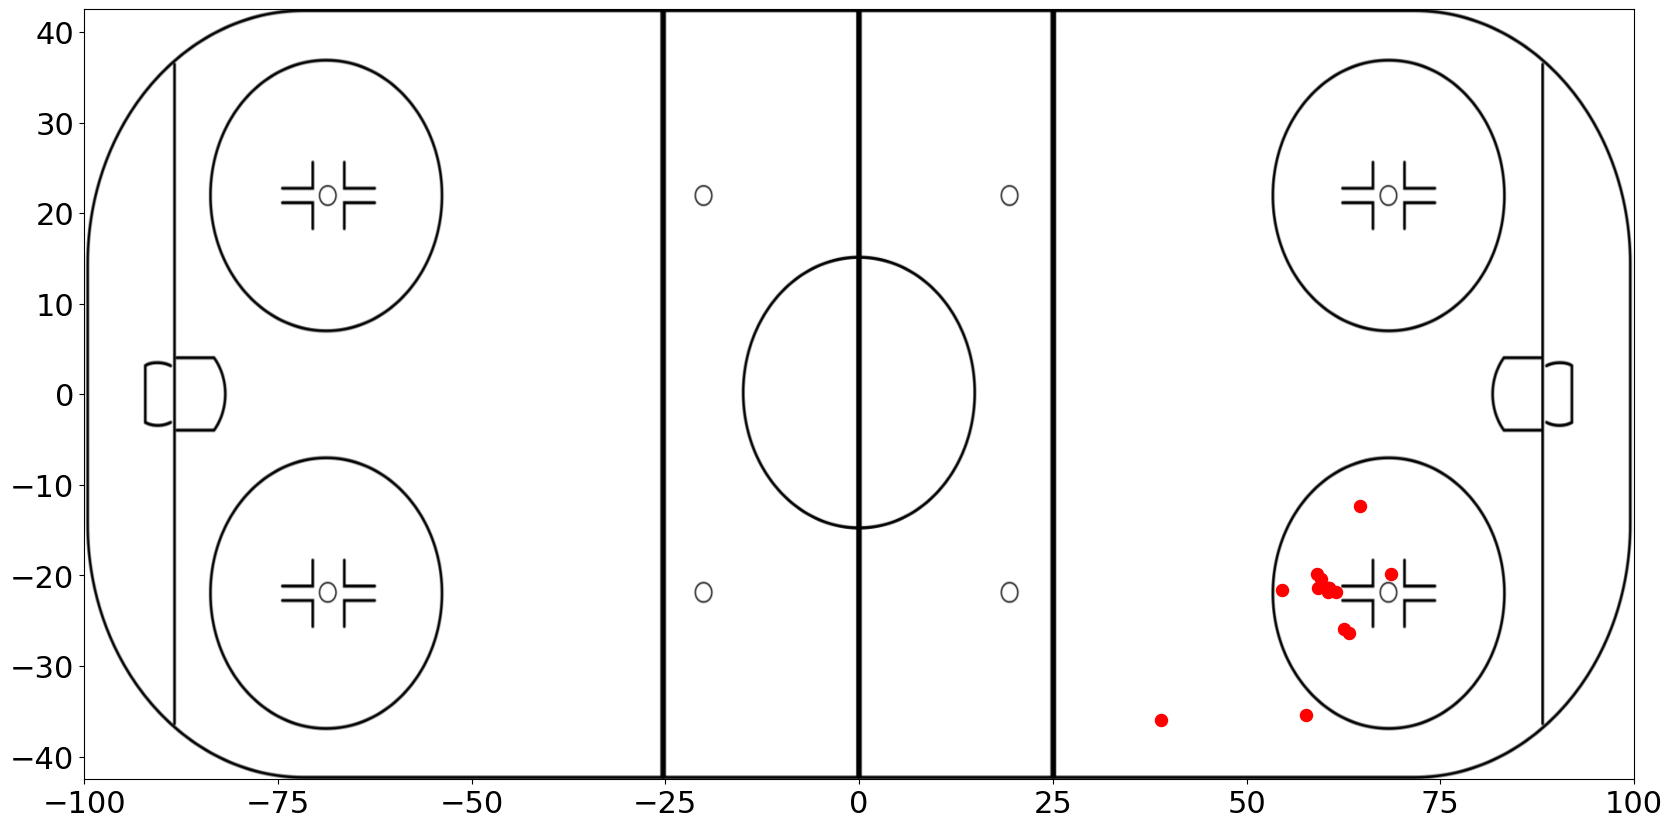

In [20]:
# Q2 Part b) 
plt.figure(figsize=(20, 10))

rinkPlot = plt.imshow(rink, aspect='auto', extent=[-100, 100, -42.5, 42.5])

player_shots = np.where((game_playerID == player_scoredWinningGoal) & (game_eventName == 'shot') & (game_manpower == 'powerPlay'))[0]

print('Player with ID', player_scoredWinningGoal ,'had', len(player_shots), 'power play shot attempts.')

player_shots_x_coords = np.take(game_xAdj, player_shots)
player_shots_y_coords = np.take(game_yAdj, player_shots)

plt.scatter(player_shots_x_coords, player_shots_y_coords, c='r', s=75)

plt.show()

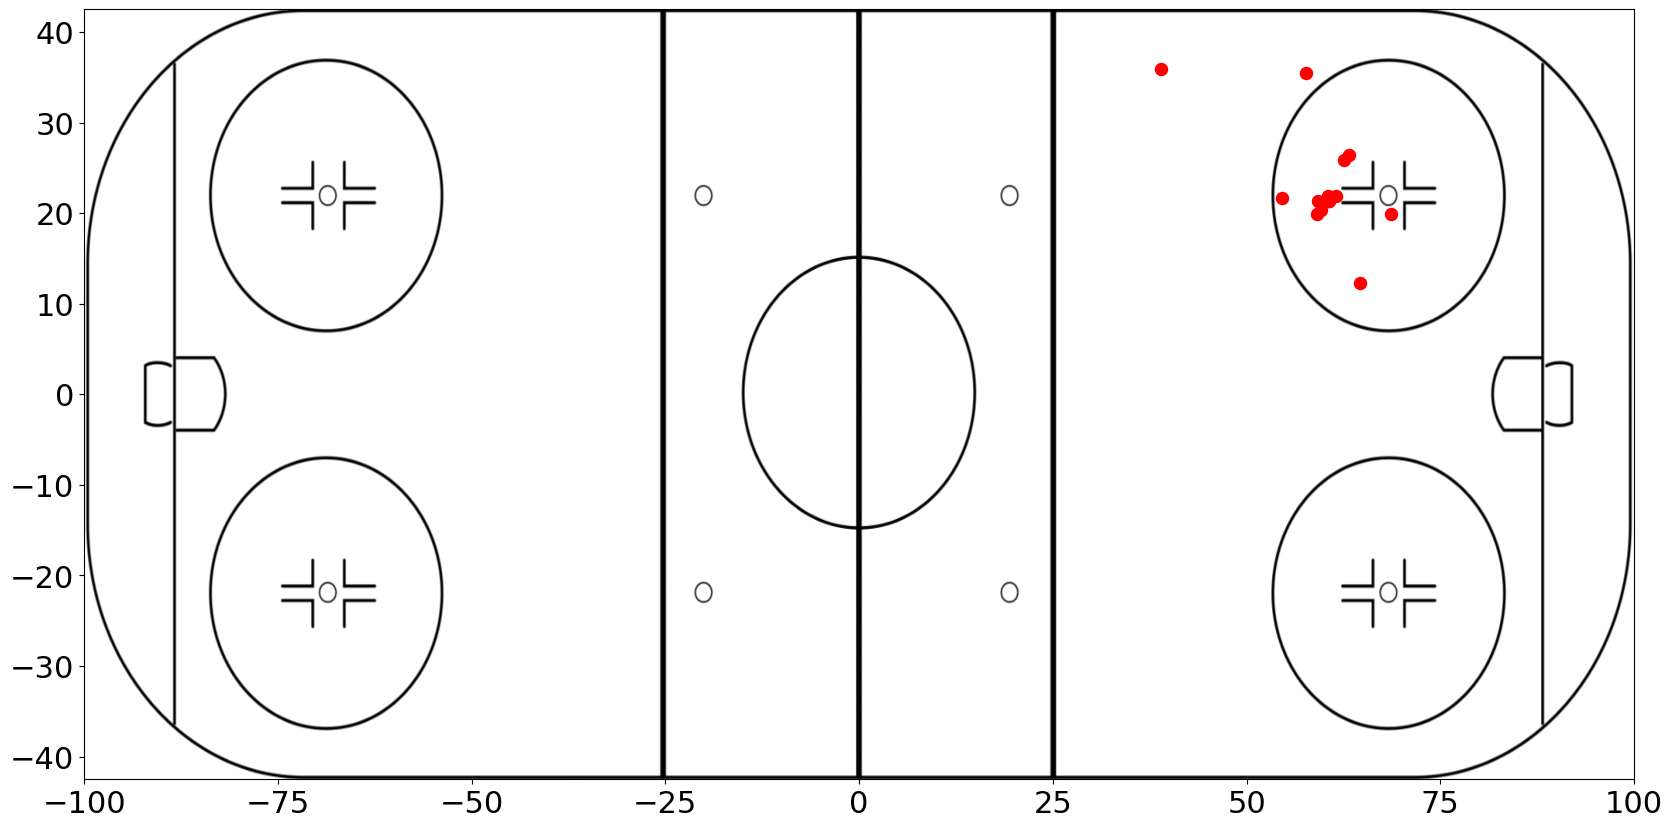

In [21]:
# Q2 part c)
''' 
Using this rink layout, Ovi's office should be around ~ y = 25 since Ovi
is right-handed and should be shooting from the left side of the rink 
during a power play. Therefore, the y-coordinates would have to be reflected 
to the other side of the ice (so multiply by -1) to make it look like these 
were Ovi's shots. Shown below is the updated plot for Ovi.
'''

plt.figure(figsize=(20, 10))

rinkPlot = plt.imshow(rink, aspect='auto', extent=[-100, 100, -42.5, 42.5])

plt.scatter(player_shots_x_coords, -player_shots_y_coords, c='r', s=75)

plt.show()

## A2)
### a) Player ID 81408 for Team 315
### b) Player 81408 had 15 shot attempts while on a power play. Refer to Code shown above. ![image info](Q2partb.png)
### c) If Player 81408 was Ovi, then the y coordinates would have to be reflected upwards (multipied by -1) since Ovi is right handed but plays on the opposite side (left side) during a power play to recieve one timers. Updated plot shown below.![image info](Q2partc.png)


## Q3)
### a) The Assistant Coach wants to know how each team's even strength pass completion rate breaks down in each zone (please use the zone of pass origin). Build a simple visual to display this information for them in a clear and digestible way. 
### b) Which zone was more difficult to complete passes in at even strength, why do you think that is? 
### c) What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

Text(0.5, 0, 'Teams')

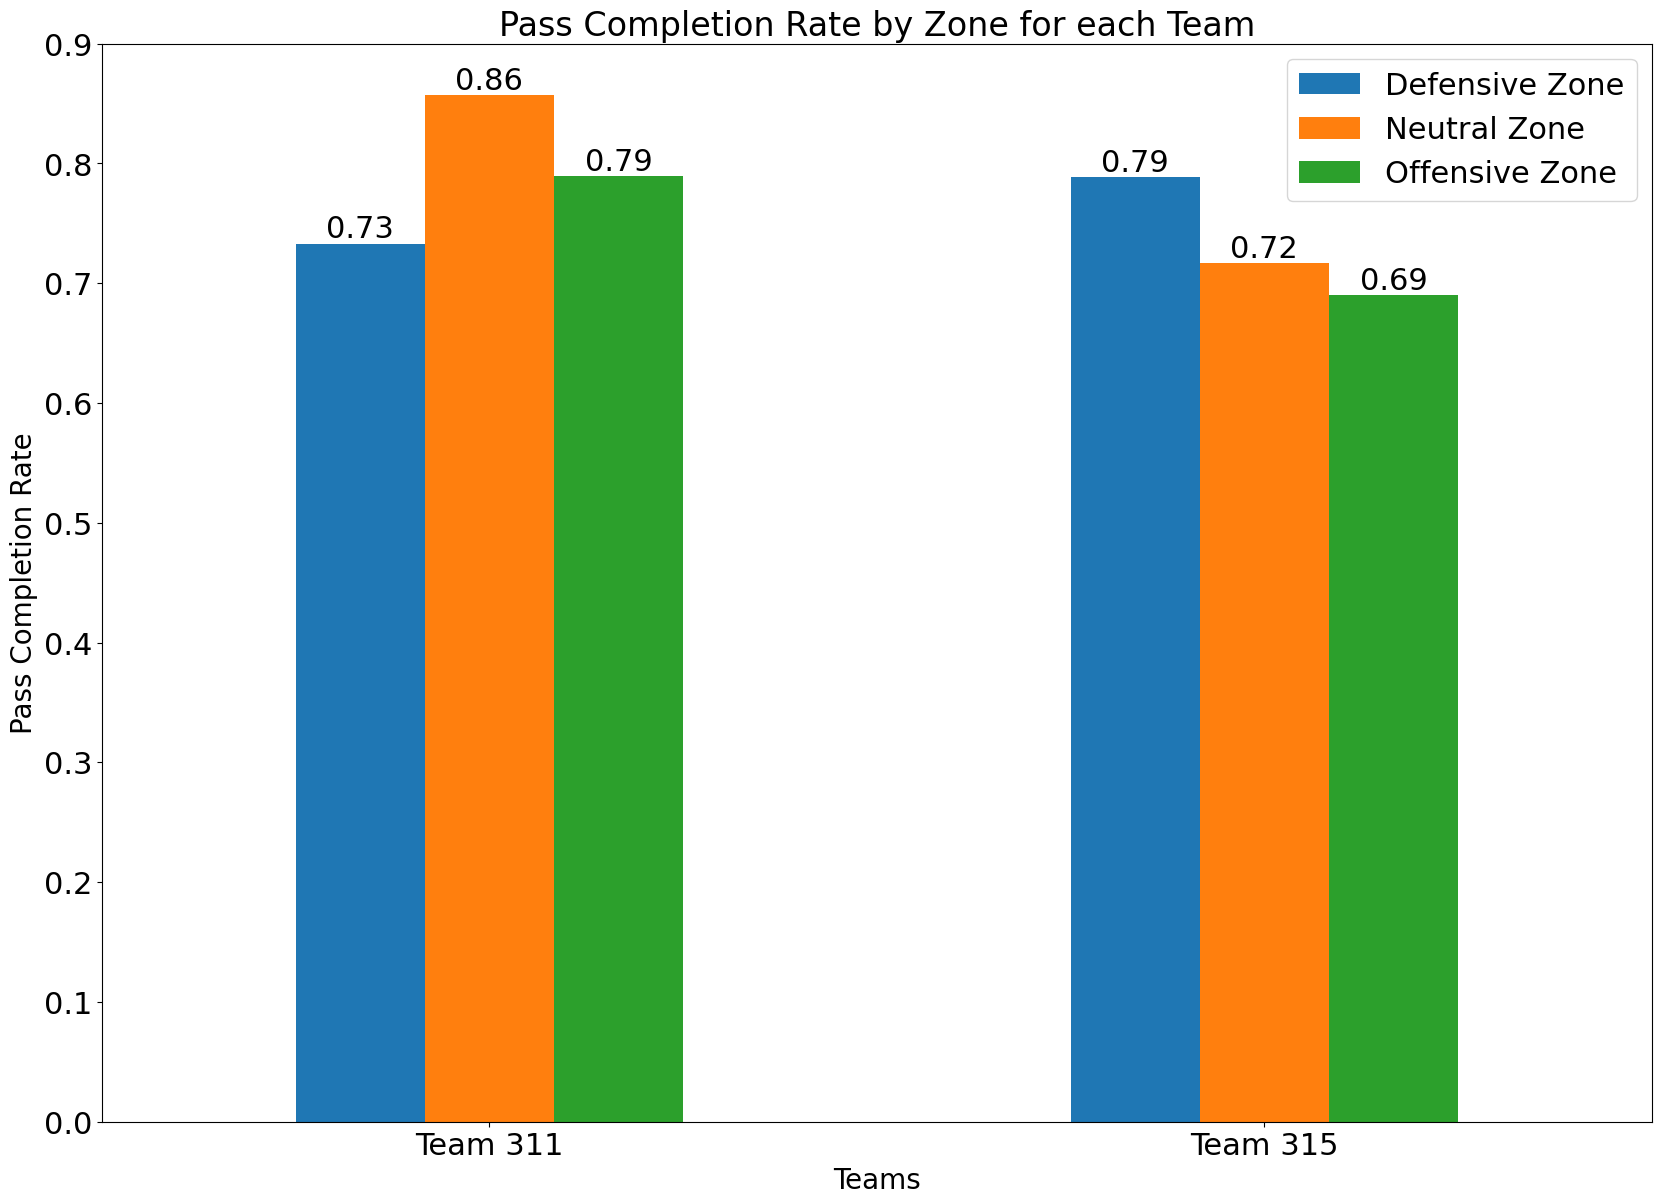

In [22]:
# Q3 part a) 

def passCompletionRate(team, zone):
    totalPasses = np.where((game_teamID == team) & (game_eventName == 'pass') & (game_zone == zone))[0]
    completedPasses = np.where((game_teamID == team) & (game_eventName == 'pass') & (game_zone == zone) & (game_outcome == 'successful'))[0]
    return len(completedPasses) / len(totalPasses)

team1_rate_dz = passCompletionRate(311, 'dz')
team1_rate_nz = passCompletionRate(311, 'nz')
team1_rate_oz = passCompletionRate(311, 'oz')

team2_rate_dz = passCompletionRate(315, 'dz')
team2_rate_nz = passCompletionRate(315, 'nz')
team2_rate_oz = passCompletionRate(315, 'oz')

fig, ax = plt.subplots(figsize=(20, 14))

df = pd.DataFrame({
    'Teams': ['Team 311', 'Team 315'],
    'Defensive Zone': [team1_rate_dz, team2_rate_dz],
    'Neutral Zone': [team1_rate_nz, team2_rate_nz],
    'Offensive Zone': [team1_rate_oz, team2_rate_oz]
})

df.plot(x='Teams', y = ['Defensive Zone', 'Neutral Zone', 'Offensive Zone'],kind='bar', rot=0, ax=ax)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:,.2f}' for x in container.datavalues])

ax.set_ylabel('Pass Completion Rate', fontsize=20)
ax.set_title('Pass Completion Rate by Zone for each Team', fontsize=24)
ax.set_xlabel('Teams', fontsize=20)

In [23]:
# Q3 part c)
team1_goalieID = 5152
team2_goalieID = 80264

def slotSavePercentage(team):
    team_shots = np.where((game_teamID == team) & (game_eventName == 'shot') & (game_outcome == 'successful') & (game_type == 'slot'))[0]
    goalie_saves = np.where((game_teamID == team) & (game_eventName == 'shot') & (game_outcome == 'successful') & (game_type == 'slot') & (game_goal == 0))[0]
    
    return len(goalie_saves) / len(team_shots)

print('Team 311 goalie with ID', team1_goalieID, 'had a slot save percentage of', round(slotSavePercentage(315), 3),'%')
print('Team 315 goalie with ID', team2_goalieID, 'had a slot save percentage of', round(slotSavePercentage(311), 3),'%')

Team 311 goalie with ID 5152 had a slot save percentage of 0.917 %
Team 315 goalie with ID 80264 had a slot save percentage of 0.846 %


## A3) 
### a) ![image info](Q3parta.png)
### b) While playing at even strength, the lowest rate of pass completon for both teams was in the offense zone. This makes sense as teams while defending tend to block passing lanes and become more aggressive, making passing in the offensive zone more challenging but more rewarding as making more passes makes the goaltender move more. 
### c) Goalie ID 5152 slot save percentage = 0.917%. 
###     Goalie ID 80264 slot save percentage = 0.846%.

## Q4)
### a) Assuming the centre of the net is at X=89 (goal line), Y=0 (centre ice), what was the average shot distance for each team for shots from the outside north west playsection to the centre of the net?
### b) What was each goalie's Goals Saved Above Expected from the outside north west playsection? What does this tell us about their performance from this area?

In [24]:
# Q4 part a)
def averageDistanceSection(teamID):
    team_shot_oustideNW = np.where((game_teamID == teamID) & (game_eventName == 'shot') & (game_outcome == 'successful') & (game_playSection == 'outsideNorthWest'))[0]
    team_shot_x_coords = np.take(game_xAdj, team_shot_oustideNW)
    team_shot_y_coords = np.take(game_yAdj, team_shot_oustideNW)
    
    return np.sqrt((89 - np.mean(team_shot_x_coords))**2 + (0 - np.mean(team_shot_y_coords))**2)

print(averageDistanceSection(311))
print(averageDistanceSection(315))

27.27973440347852
31.508711694674343


In [25]:
# Q4 part b)

def checkXGForShot(teamID, gameArea):
    team_shot = np.where((game_teamID == teamID) & (game_eventName == 'shot') & (game_outcome == 'successful') & (game_playSection == gameArea))[0]
    team_time = np.take(game_compiledTime, team_shot)
    
    shot_occourances = np.in1d(xg_compiledTime, team_time)

    team_xg = np.take(xg_expectedGoals, np.where(shot_occourances))[0]
    
    return np.sum(team_xg)

def GoalsSavedAboveExpected(expectedGoalsAgainst, goalsAgainst):
    return expectedGoalsAgainst - goalsAgainst
    
print('Team 311 xG for shots in the outsideNorthWest section:', checkXGForShot(311, 'outsideNorthWest'))
print('Team 315 xG for shots in the outsideNorthWest section:', checkXGForShot(315, 'outsideNorthWest'))

team1_goalsFromSection = np.where((game_teamID == 311) & (game_eventName == 'shot') & (game_outcome == 'successful') & (game_playSection == 'outsideNorthWest') & (game_goal == 1))[0]
team2_goalsFromSection = np.where((game_teamID == 315) & (game_eventName == 'shot') & (game_outcome == 'successful') & (game_playSection == 'outsideNorthWest') & (game_goal == 1))[0]
    
print('Goalie', team1_goalieID, 'Goals Saved Above Expected was', GoalsSavedAboveExpected(checkXGForShot(315, 'outsideNorthWest'), len(team2_goalsFromSection)),'from the outsideNorthWest section')
print('Goalie', team2_goalieID, 'Goals Saved Above Expected was', GoalsSavedAboveExpected(checkXGForShot(311, 'outsideNorthWest'), len(team1_goalsFromSection)),'from the outsideNorthWest section')



Team 311 xG for shots in the outsideNorthWest section: 0.32997239700000003
Team 315 xG for shots in the outsideNorthWest section: 0.474473045
Goalie 5152 Goals Saved Above Expected was -1.5255269550000001 from the outsideNorthWest section
Goalie 80264 Goals Saved Above Expected was -0.670027603 from the outsideNorthWest section


## A4)
### a) The Average shot distance from outside northwest playsection for each Team: 
#### Team 311 = 27.28 feet
#### Team 315 = 31.51 feet

### b) Each goalie's Goals Saved Above Expected from the outside northwest playsection is:
#### Goalie 5152 = -1.526 goals
#### Goalie 80264 = -0.6700 goals
### Each goalie allowed more goals in from this area than expected, meaning each goalie had a poor performance (performing below expected) from this area this game. 

## Q5)
### a) If a "Shot Assist" is defined as a sequence of events where there is: 1) a successful pass followed by 2) a successful reception by a *teammate* and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. How many shot attempts did playerid 7380 have that were assisted?
### b) For shots that were assisted, if the full xG value from the shot attempt was credited to the passer for their successful pass (shot assist), which passer created the most xG for their teammates?
### c) Plot a single diagram of this passer's shot assists (pass to reception) and their corresponding shots (reception to shot). Hint: Don't forget what you learned about plotting Y coordinates.

In [26]:
# Q5 part a)
sequence = np.array(['pass', 'reception', 'shot'])

sequenceLen = len(sequence)
numEvents = len(game_eventName)

r_sequences = np.arange(sequenceLen)

match = (game_eventName[np.arange(numEvents-sequenceLen+1)[:, None] + r_sequences] == sequence).all(1)

if match.any() > 0:
    sequenceIndexes = np.where(np.convolve(match, np.ones((sequenceLen), dtype=int)) > 0)[0]
else:
    sequenceIndexes = np.array([])

shotAssistsColumn = np.zeros(numEvents)
shotAssistsColumn[sequenceIndexes[2::3]] = 1

gameEvent['shotAssist'] = shotAssistsColumn
gameEvent.to_csv('DA_Tutorial_24.csv', index=False)

wrongPlayerID = 7380
player_shotsAssisted = np.where((game_playerID == wrongPlayerID) & (game_eventName == 'shot') & (shotAssistsColumn == 1))[0]
doesPlayerExist = len(np.where(game_playerID == wrongPlayerID)[0]) > 0


print('Player ID', wrongPlayerID, 'has:', len(player_shotsAssisted), 'shots assisted. However, this player does not exist in the dataset where doesPlayerExist:', doesPlayerExist)

playerID = 79380
player_shotsAssisted = np.where((game_playerID == playerID) & (game_eventName == 'shot') & (shotAssistsColumn == 1))[0]

print('However, Player ID', playerID, 'exists in the dataset and has:', len(player_shotsAssisted), 'shots assisted.')


Player ID 7380 has: 0 shots assisted. However, this player does not exist in the dataset where doesPlayerExist: False
However, Player ID 79380 exists in the dataset and has: 7 shots assisted.


In [27]:
# Q5 part b)
from collections import defaultdict

passingPlayers = game_playerID[sequenceIndexes[0::3]]

shot_compliedTime = game_compiledTime[sequenceIndexes[2::3]]
xg_shot = np.take(xg_expectedGoals, np.where(np.in1d(xg_compiledTime, shot_compliedTime)))[0]

player_shotAssistDict = defaultdict(int)

for player, value in zip(passingPlayers, xg_shot):
    player_shotAssistDict[player] += value

player_shotAssistDict_keys = list(player_shotAssistDict.keys())
player_shotAssistDict_values = list(player_shotAssistDict.values())

player_mostShotAssist_xG = player_shotAssistDict_keys[player_shotAssistDict_values.index(max(player_shotAssistDict_values))]
player_mostShotAssist_xG_value = player_shotAssistDict[player_mostShotAssist_xG]



print('Player ID:', player_mostShotAssist_xG, 'had the most xG from shots assisted with:', player_mostShotAssist_xG_value, 'goals.')

Player ID: 94531 had the most xG from shots assisted with: 0.6626902050000001 goals.


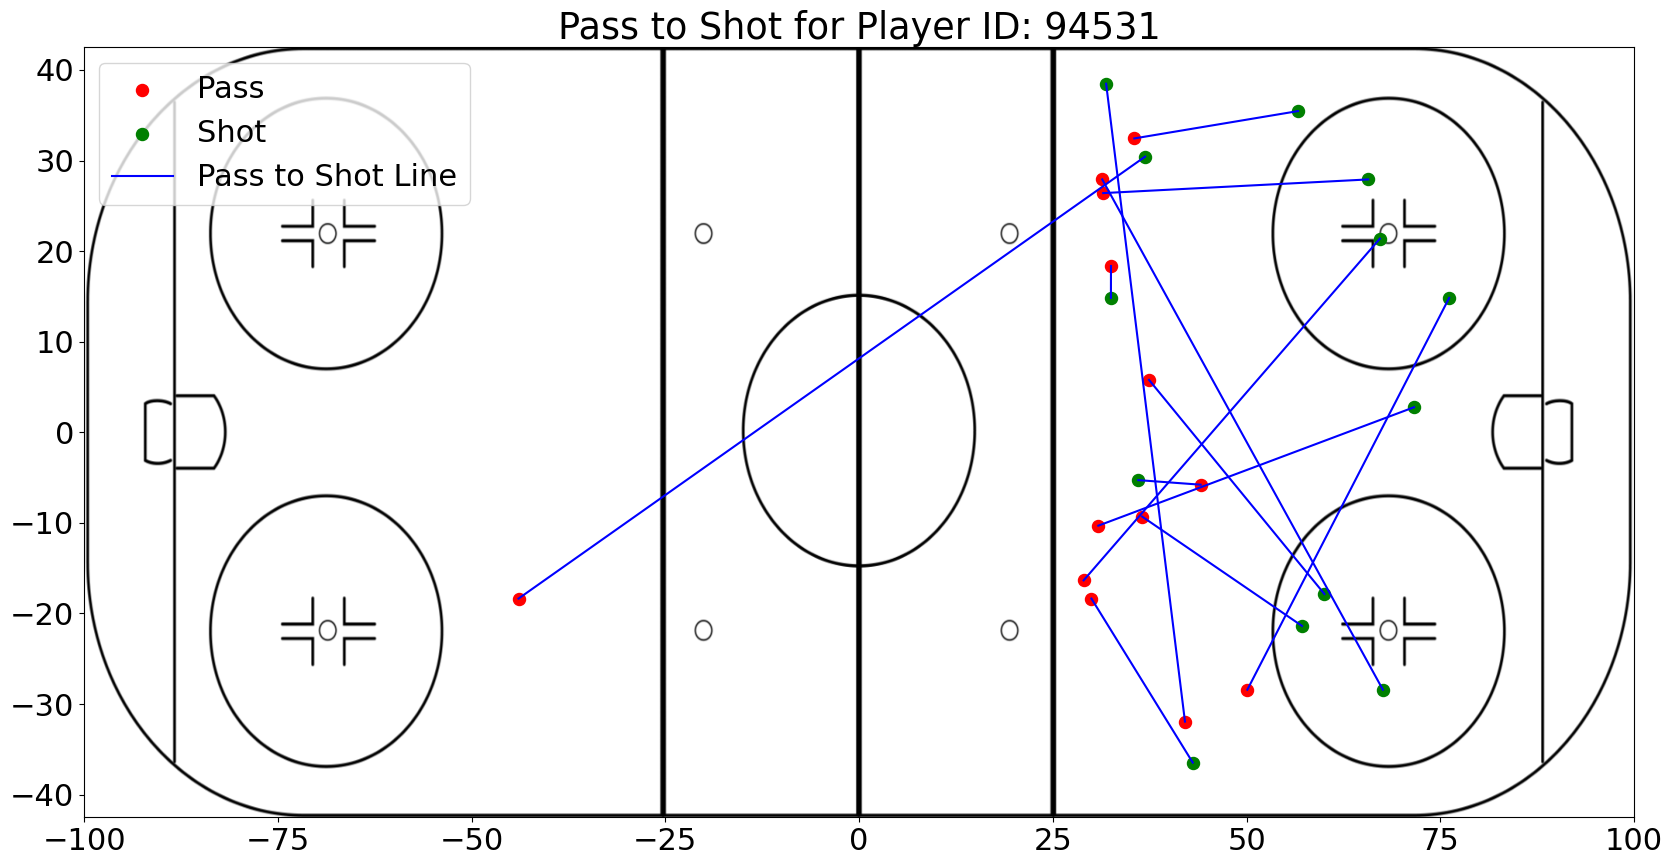

In [28]:
# Q5 part c)

player_shotAssists_pass = np.where((game_playerID[sequenceIndexes[0::3]] == player_mostShotAssist_xG))[0]

player_shotAssists_pass_xCoords = np.take(game_xAdj[sequenceIndexes[0::3]], player_shotAssists_pass)
player_shotAssists_pass_yCoords = np.take(game_yAdj[sequenceIndexes[0::3]], player_shotAssists_pass)

player_shotAssists_shot_xCoords = np.take(game_xAdj[sequenceIndexes[2::3]], player_shotAssists_pass+1)
player_shotAssists_shot_yCoords = np.take(game_yAdj[sequenceIndexes[2::3]], player_shotAssists_pass+1)

plt.figure(figsize=(20, 10))

rinkPlot = plt.imshow(rink, aspect='auto', extent=[-100, 100, -42.5, 42.5])
plt.scatter(player_shotAssists_pass_xCoords, player_shotAssists_pass_yCoords, c='r', s=75, label='Pass')
plt.scatter(player_shotAssists_shot_xCoords, player_shotAssists_shot_yCoords, c='g', s=75, label='Shot')

xx = np.vstack([player_shotAssists_shot_xCoords, player_shotAssists_pass_xCoords])
yy = np.vstack([player_shotAssists_shot_yCoords, player_shotAssists_pass_yCoords])

plt.plot(xx, yy, 'b', label='Pass to Shot Line')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Pass to Shot for Player ID: ' + str(player_mostShotAssist_xG))
plt.show()


## A5)
### a) Column flagging shots that were shot assisted are shown in DA_Tutorial_24.csv file. As per the question statement, Player ID 7380 has: 0 shots assisted. However, this player does not exist in the dataset given (refer to code which tries to find references to player 7380 in given excel file). I believe this is a mistake as Player ID 79380 exists in the dataset and has: 7 shots assisted.
### b) Player ID: 94531 created the most xG from shots assisted with: 0.6627 expected assists.
### c) ![image info](Q5partc.png)

## Q6)
### a) Which team won the xG battle and how much xG did each teamid have?
### b) Given who won the game, what does this tell you about how the game went?

In [29]:
# Q6 part a)

def teamTotalXG(teamID):
    team_shot = np.where((game_teamID == teamID) & (game_eventName == 'shot'))[0]
    team_time = np.take(game_compiledTime, team_shot)
    
    shot_occourances = np.in1d(xg_compiledTime, team_time)

    team_xg = np.take(xg_expectedGoals, np.where(shot_occourances))[0]
    
    return np.sum(team_xg)

print('Team 311 total xG:', teamTotalXG(311))
print('Team 315 total xG:', teamTotalXG(315))
print('Team 311 won the xG game, beating Team 315 3.675 to 2.675')


Team 311 total xG: 3.674770051
Team 315 total xG: 2.675057599
Team 311 won the xG game, beating Team 315 3.675 to 2.675


## A6)
### a) Team 311 won the xG battle this game, beating Team 315 3.675 goals to 2.675 goals. 
#### Team 311 total xG = 3.675 goals
#### Team 315 total xG = 2.675 goals
### Note: technically goals shouldn't be decimals since you can't have half a goal and should be rounded to nearest whole number. However, disregard this fact for this question. 

### b) In reality, Team 315 beat Team 311 4-3. The xG battle between the teams compared to the actual score shows that Team 311 were making better shots and had better scoring chances compared to Team 315. The reason for the deviation could be due to bad bounces in the defensive zone or terrible defence by Team 311. 

## Q7) 
### a) With the information provided in the data files and the columns you've been asked to create in the questions above, use a statistical technique of your choice to show the highest predictors of a goal within this dataset (what would use if you were building an xG model).
### b) Please explain your reasoning for your choices in answering 7a) and then explain your findings like you were talking to the Assistant Coach.

### Hint: look back at the columns you were asked to create, along with the information already provided in the event dataset, what would lead to dangerous shot attempts? Are there other features from a pass-reception-shot sequence (for example) that would be easy to create with the information provided?

[2.03297547e-01 6.10059464e-02 2.83789978e-01 1.14383766e-01
 4.34412887e-05 1.11749065e-01 8.86684377e-02 1.44811620e-02
 7.03787949e-02 1.32327646e-01 2.59347188e-01 1.09506607e-01]
1.4489795796157245
[1556 1570 1591 1596 1631 1663 1690 1709 1714 1725 1730 1796]
[0.01165163 0.02243383 0.18000074 0.09357866 0.19046491 0.00186608
 0.05191923 0.0402515  0.09081408 0.07879461 0.10054265 0.05090982]
0.9132277439999998


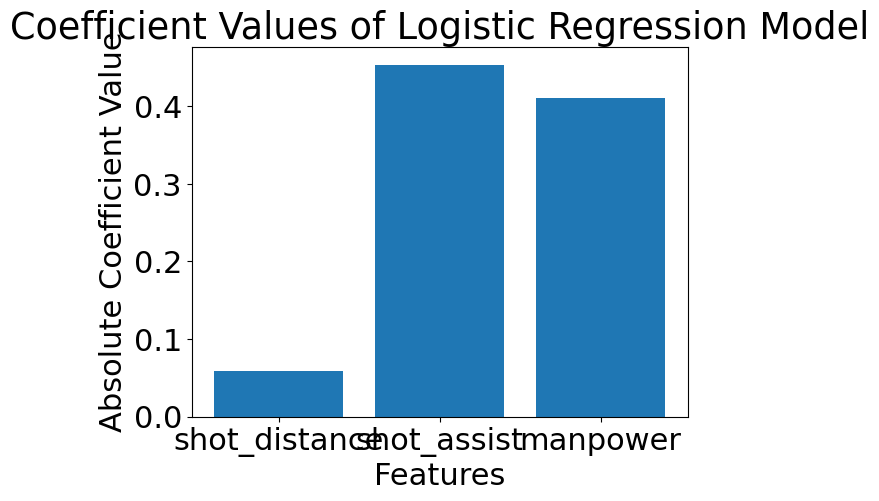

In [69]:
# Q7 part a)
''' 
A logistic regression model will be used to predict the outcome of a shot attempt.
'''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

shotsOnNet = np.where((game_eventName == 'shot') & (game_outcome == 'successful'))[0]


shot_distance = np.sqrt((89 - game_xAdj[shotsOnNet])**2 + (0 - game_yAdj[shotsOnNet])**2)

manpower_situation = game_manpower[shotsOnNet]
manpower_situation = [0 if x == 'evenStrength' else 1 if x == 'powerplay' else -1 for x in manpower_situation]

xG_model_data = {
    'shot_distance': shot_distance,
    'shot_assist': shotAssistsColumn[shotsOnNet],
    'manpower': manpower_situation,
    'goal': game_goal[shotsOnNet] 
}

xGModel = pd.DataFrame(xG_model_data)

X = xGModel[['shot_distance', 'shot_assist', 'manpower']]
Y = xGModel['goal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)

xG_pred = model.predict(X_test)
xG_pred_proba = model.predict_proba(X_test)[:,-1]

print(xG_pred_proba)
print(np.sum(xG_pred_proba))

print(shotsOnNet[-12:])

game_time = game_compiledTime[shotsOnNet[-12:]]

sameTime = np.in1d(xg_compiledTime, game_time)

actual_xg = np.take(xg_expectedGoals, np.where(sameTime))[0]

print(actual_xg)
print(np.sum(actual_xg))

xgModel_coefficients = model.coef_

# Get the absolute values of the coefficients
abs_coefficients = np.abs(xgModel_coefficients[0])

# Get the feature names
features = X.columns

# Create a bar graph
plt.bar(features, abs_coefficients)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Coefficient Values of Logistic Regression Model')

# Display the graph
plt.show()




## A7)
### a)
### b)

# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest and we hope you enjoyed this exercise!